In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_curve,precision_score,roc_auc_score,accuracy_score,recall_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
import datetime
import warnings
warnings.filterwarnings('ignore')
#Imports for better Visualisation
from matplotlib import rcParams
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]
rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [106]:
tr = pd.read_csv("Downloads/Cogni_data/train_DaEJRFg.csv")
te = pd.read_csv("Downloads/Cogni_data/test_TQDFDgg.csv")
sample = pd.read_csv("Downloads/Cogni_data/sample_submission_n2Tyn0h.csv")

In [107]:
print(tr.shape,te.shape)

(11777, 12) (5048, 11)


In [108]:
tr.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


In [109]:
tr.isnull().sum()

victim_id                       0
incident_time                   0
incident_date                   0
incident_location             307
incident_tehsil                 0
cause_of_emergency              0
base_to_scene_distance          0
scene_to_hospital_distance      0
roadway_feature                 0
road_type                       0
surrounding_area                0
criticality                     0
dtype: int64

In [110]:
te.isnull().sum()

victim_id                       0
incident_time                   0
incident_date                   0
incident_location             113
incident_tehsil                 0
cause_of_emergency              0
base_to_scene_distance          0
scene_to_hospital_distance      0
roadway_feature                 0
road_type                       0
surrounding_area                0
dtype: int64

In [111]:
tr.incident_location.unique()

array(['Subhash Nagar', 'Coro Nation', 'Kewal Vihar', ...,
       'Shartradhar Crosing', 'Ramsawala', 'Shimla Chowk'], dtype=object)

In [112]:
tr.incident_location.nunique()

5521

In [113]:
tr.incident_time=tr.incident_time.apply(lambda x: datetime.datetime.strptime(str(x),'%H:%M:%S'))
te.incident_time=te.incident_time.apply(lambda x: datetime.datetime.strptime(str(x),'%H:%M:%S'))
tr['Hour']=tr.incident_time.apply(lambda x: x.hour)
te['Hour']=te.incident_time.apply(lambda x: x.hour)

In [114]:
tr.incident_date=tr.incident_date.apply(lambda x: datetime.datetime.strptime(str(x),'%d-%m-%Y'))
te.incident_date=te.incident_date.apply(lambda x: datetime.datetime.strptime(str(x),'%d-%m-%Y'))

In [115]:
tr['Day']=tr.incident_date.apply(lambda x: x.day)
tr['Month']=tr.incident_date.apply(lambda x: x.month)
tr['Year']=tr.incident_date.apply(lambda x: x.year)
tr['Weekday']=tr.incident_date.apply(lambda x: x.weekday())
tr['Ordinal']=tr.incident_date.apply(lambda x: x.toordinal())

te['Day']=te.incident_date.apply(lambda x: x.day)
te['Month']=te.incident_date.apply(lambda x: x.month)
te['Year']=te.incident_date.apply(lambda x: x.year)
te['Weekday']=te.incident_date.apply(lambda x: x.weekday())
te['Ordinal']=te.incident_date.apply(lambda x: x.toordinal())

In [116]:
tr.criticality.value_counts()

0    11255
1      522
Name: criticality, dtype: int64

In [ ]:
# As we can see from the count that this is a highly imbalanced dataset

### Exploratory data analysis

In [117]:
tr[tr.criticality==1]['Hour'].value_counts()

21    48
20    46
18    33
22    32
19    31
16    31
13    31
17    28
14    28
15    27
9     26
23    21
10    20
12    19
0     17
6     15
11    15
1     14
7     13
8     10
5      7
4      4
3      3
2      3
Name: Hour, dtype: int64

In [118]:
tr[tr.criticality==0]['Hour'].value_counts()

20    927
21    879
19    829
22    797
18    782
17    757
16    669
15    641
14    585
13    561
12    513
23    492
10    449
11    448
9     408
8     355
7     274
0     268
6     159
1     143
5     107
4      86
2      68
3      58
Name: Hour, dtype: int64

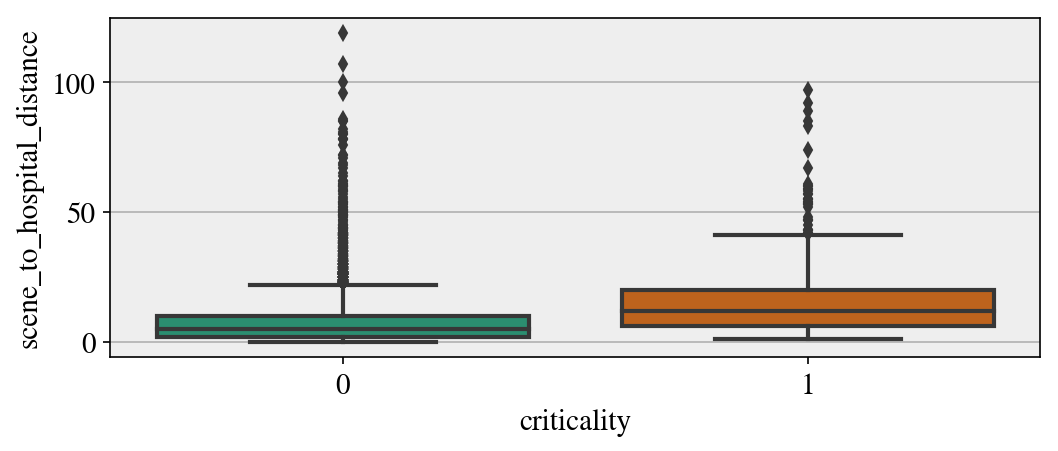

In [140]:
sns.boxplot(x="criticality", y="scene_to_hospital_distance", data=tr)

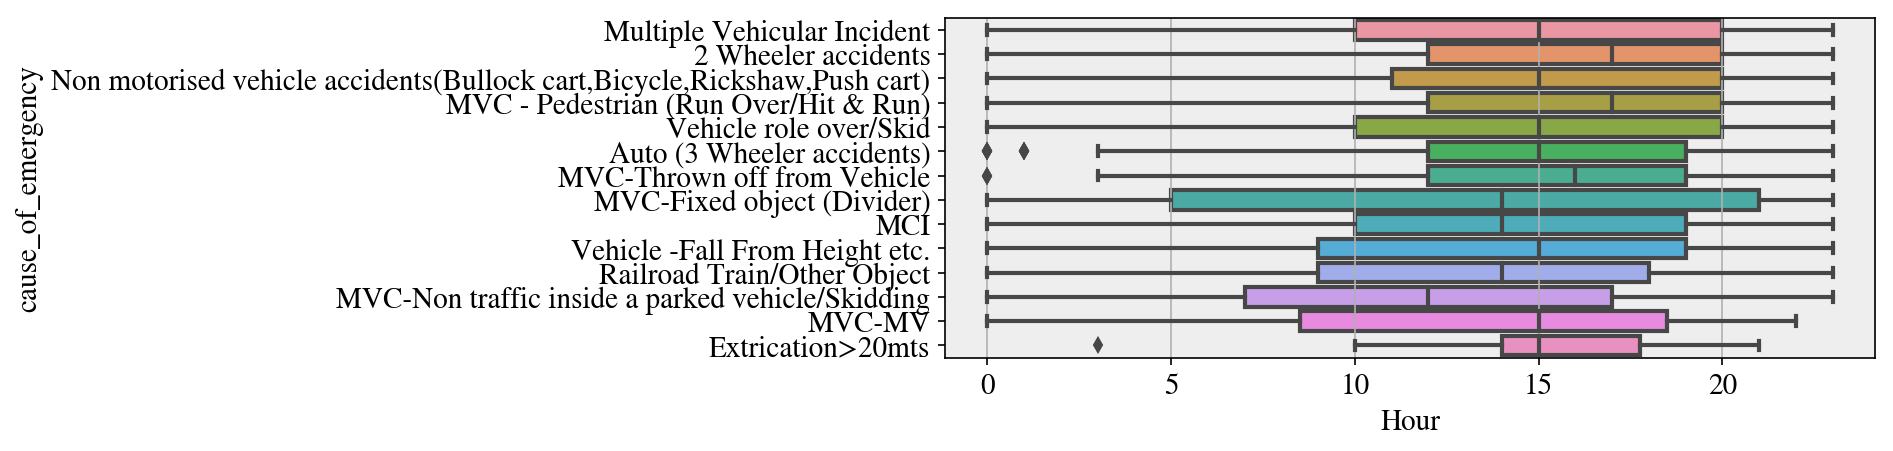

In [149]:
sns.boxplot(x="Hour", y="cause_of_emergency", data=tr)

In [ ]:
# We can typically see in which hour of the day accidents really happen

In [171]:
tr[tr.criticality==1]['Year'].value_counts()

2009    178
2013     89
2014     87
2012     74
2010     60
2011     34
Name: Year, dtype: int64

In [172]:
tr[tr.criticality==0]['Year'].value_counts()

2013    2076
2012    1971
2014    1908
2011    1881
2010    1768
2009    1651
Name: Year, dtype: int64

In [ ]:
# from the data, the accidents have particularly increased year by year

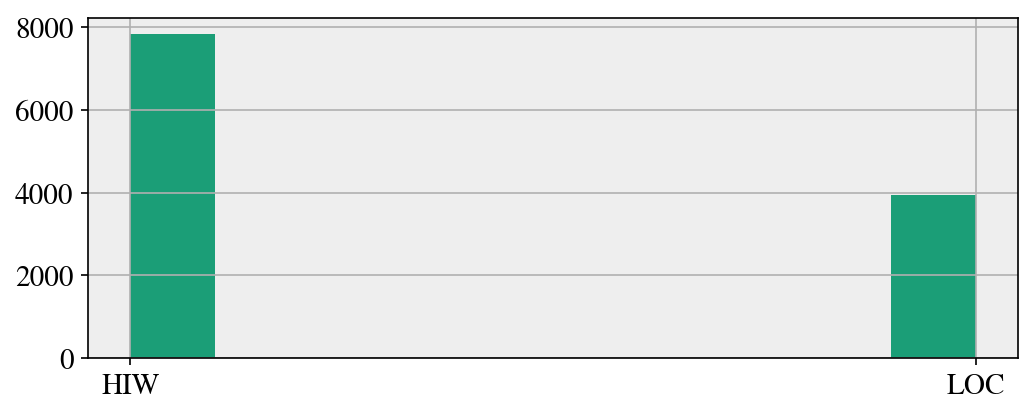

In [174]:
plt.hist(tr['road_type'])
plt.show()

In [227]:
hm =tr.groupby(['surrounding_area','criticality']).count().sort_values(by='victim_id',ascending=False)

In [228]:
hm

,,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,Hour,Day,Month,Year,Weekday,Ordinal
surrounding_area,criticality,,,,,,,,,,,,,,,,
AGL,0,4661,4661,4661,4558,4661,4661,4661,4661,4661,4661,4661,4661,4661,4661,4661,4661
MAR,0,2490,2490,2490,2440,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490
COL,0,1351,1351,1351,1293,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351
FOR,0,1234,1234,1234,1194,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234,1234
HOSP,0,774,774,774,762,774,774,774,774,774,774,774,774,774,774,774,774
HIL,0,745,745,745,725,745,745,745,745,745,745,745,745,745,745,745,745
AGL,1,186,186,186,179,186,186,186,186,186,186,186,186,186,186,186,186
MAR,1,100,100,100,96,100,100,100,100,100,100,100,100,100,100,100,100
FOR,1,91,91,91,86,91,91,91,91,91,91,91,91,91,91,91,91


In [ ]:
# To our suprise a lot of accidents occured on the agricultural area 

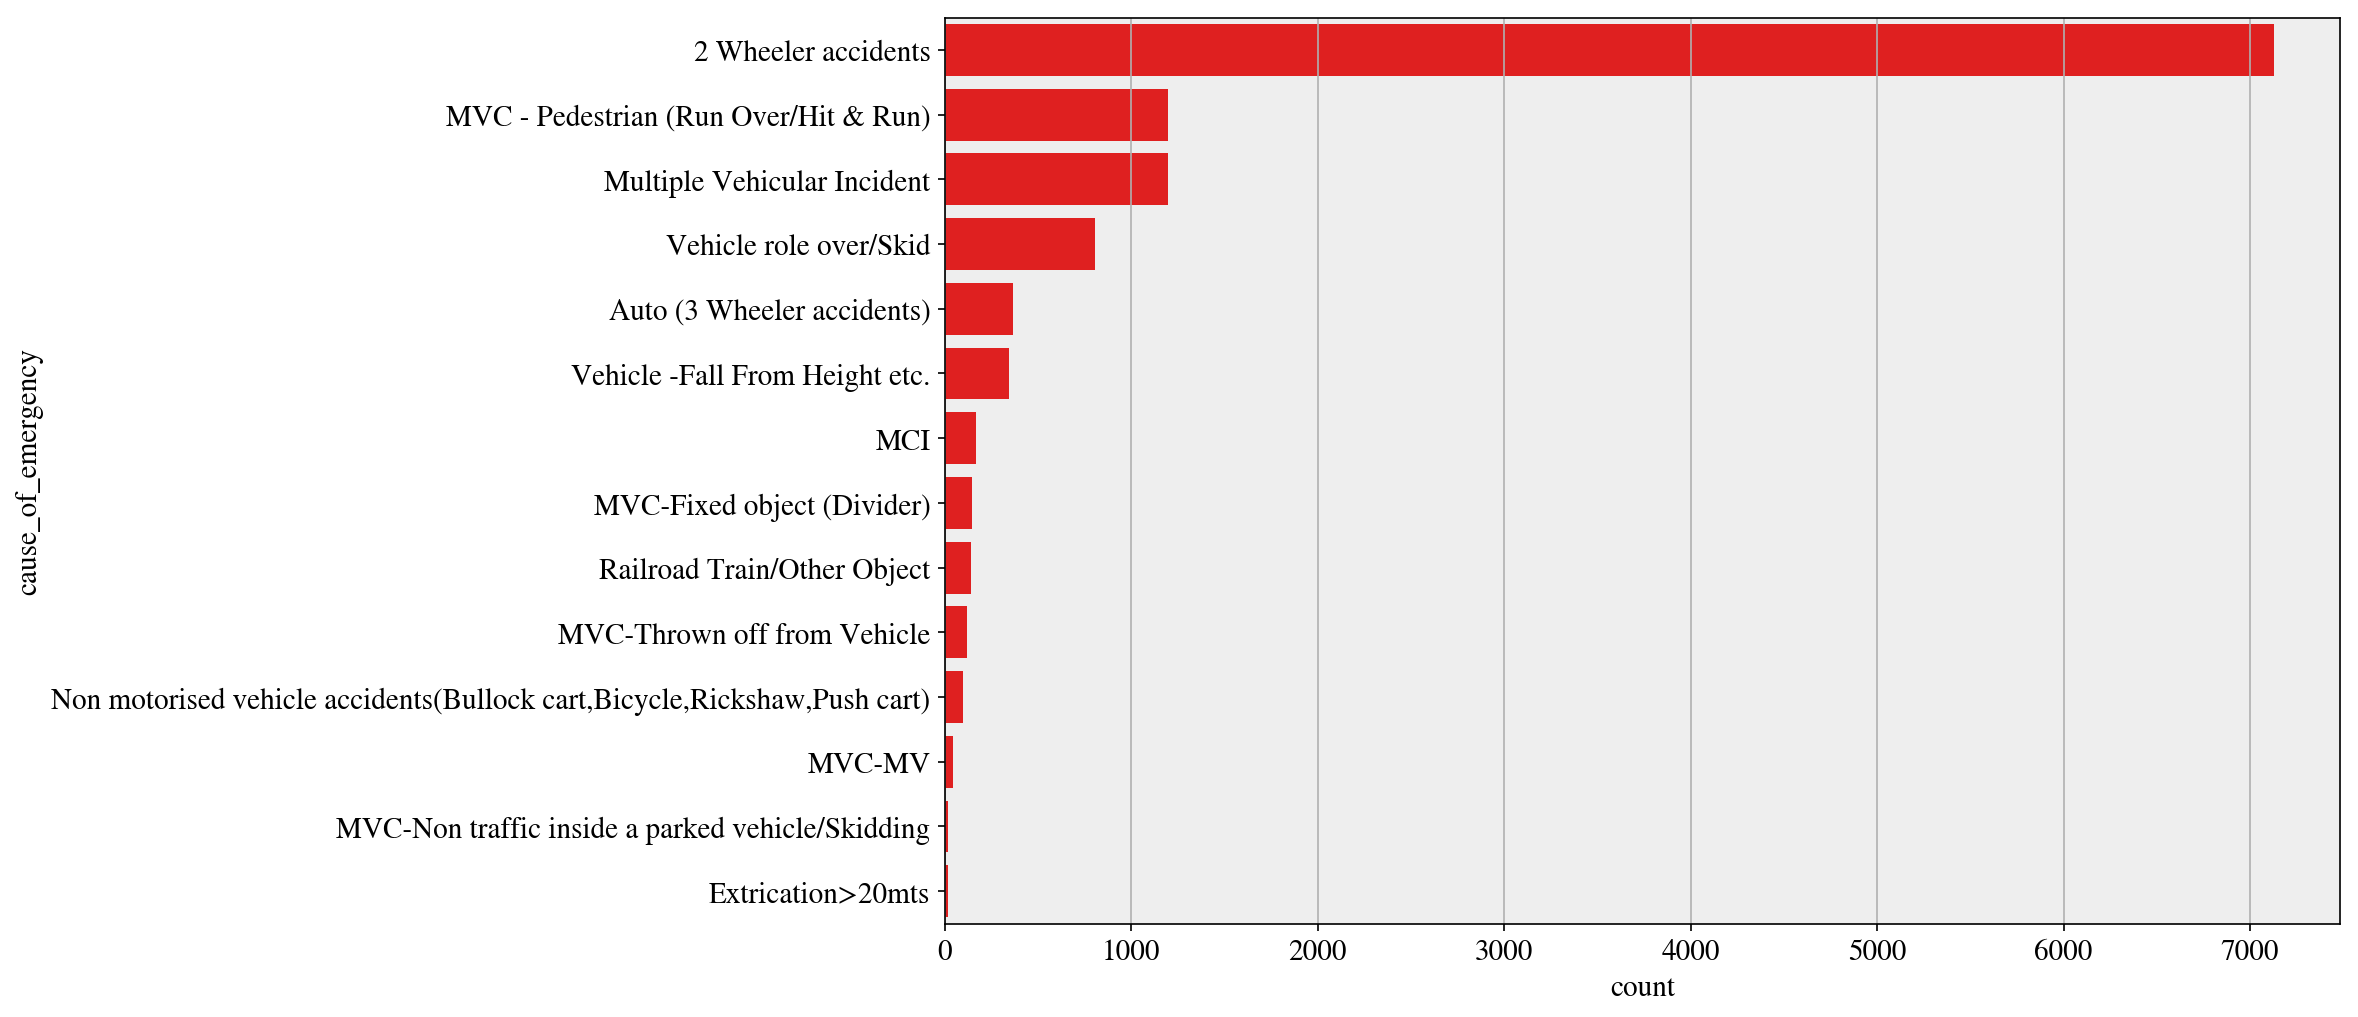

In [220]:
plt.figure(figsize=(12,8))

sns.countplot(y='cause_of_emergency',data=tr,color='r',order = tr['cause_of_emergency'].value_counts().index)

In [ ]:
# The most frequent accidents are 2 Wheeler accidents

### Feature Engineering

In [ ]:
# incident_tehsil is considered as nominal feature and all the other features are encoded ordinally.

In [43]:
one_hot = pd.get_dummies(tr['incident_tehsil'])
tr = tr.join(one_hot)

In [44]:
two_hot = pd.get_dummies(te['incident_tehsil'])
te = te.join(two_hot)

In [46]:
def label_encoder(df,col):
    le=LabelEncoder()
    le.fit(df[col])
    df[col]=le.transform(df[col])

In [47]:
label_encoder(tr,'cause_of_emergency')
label_encoder(tr,'road_type')
label_encoder(tr,'surrounding_area')
label_encoder(tr,'roadway_feature')

In [48]:
label_encoder(te,'cause_of_emergency')
label_encoder(te,'road_type')
label_encoder(te,'surrounding_area')
label_encoder(te,'roadway_feature')

In [ ]:
#New feature is created by adding base_to_scene and base_to_scene distances.

In [51]:
tr['base_to_hospital_distance']=tr['base_to_scene_distance']+tr['scene_to_hospital_distance']
te['base_to_hospital_distance']=te['base_to_scene_distance']+te['scene_to_hospital_distance']

In [53]:
tr.shape

(11777, 26)

In [54]:
tr.head()


,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,...,Weekday,Ordinal,Chakrata,Dehradun,Doiwala,Kalsi,Raipur,Sahaspur,Vikasnagar,base_to_hospital_distance
0,VIC20120001987267,1900-01-01 22:23:19,2012-11-07,Subhash Nagar,Raipur,9,13,12,0,0,...,2,734814,0,0,0,0,1,0,0,25
1,VIC20110002147887,1900-01-01 20:23:09,2011-11-02,Coro Nation,Raipur,0,1,5,0,0,...,2,734443,0,0,0,0,1,0,0,6
2,VIC20090001391483,1900-01-01 20:37:15,2009-07-25,Kewal Vihar,Raipur,10,2,2,1,1,...,5,733613,0,0,0,0,1,0,0,4
3,VIC20120000900722,1900-01-01 15:20:22,2012-05-19,I S B T,Raipur,0,8,4,0,0,...,5,734642,0,0,0,0,1,0,0,12
4,VIC20100001241285,1900-01-01 16:22:17,2010-06-12,Sahaspur Ambu,Sahaspur,0,1,26,0,0,...,5,733935,0,0,0,0,0,1,0,27


In [ ]:
# Incident Location has been dropped for modelling as it has around 5000 locations

In [55]:
tr.drop(tr.columns[[0,1,2,3,4,6,7]], axis=1, inplace=True)

In [57]:
x = te.iloc[:, 0]

In [58]:
te.drop(te.columns[[0,1,2,3,4,6,7]], axis=1, inplace=True)

In [60]:
X = tr.ix[:, tr.columns != 'criticality']
y = tr.ix[:, tr.columns == 'criticality']

In [61]:
X.head()

,cause_of_emergency,roadway_feature,road_type,surrounding_area,Hour,Day,Month,Year,Weekday,Ordinal,Chakrata,Dehradun,Doiwala,Kalsi,Raipur,Sahaspur,Vikasnagar,base_to_hospital_distance
0,9,0,0,2,22,7,11,2012,2,734814,0,0,0,0,1,0,0,25
1,0,0,0,0,20,2,11,2011,2,734443,0,0,0,0,1,0,0,6
2,10,1,1,4,20,25,7,2009,5,733613,0,0,0,0,1,0,0,4
3,0,0,0,3,15,19,5,2012,5,734642,0,0,0,0,1,0,0,12
4,0,0,0,0,16,12,6,2010,5,733935,0,0,0,0,0,1,0,27


In [ ]:
#Cross-validation

In [73]:
xg=XGBClassifier(learning_rate=0.1,n_estimators=100)
score=cross_val_score(estimator=xg,X=X,y=y,cv=10,scoring='roc_auc')
print(score.mean())

0.754096220343


In [205]:
ad=AdaBoostClassifier(learning_rate=1.0,n_estimators=100)
score1=cross_val_score(estimator=ad,X=X,y=y,cv=10,scoring='roc_auc')
print(score1.mean())

0.74180695433


In [76]:
cal=CalibratedClassifierCV(base_estimator=XGBClassifier(learning_rate=0.1),method='sigmoid',cv=10)
score=cross_val_score(estimator=cal,cv=10,scoring='roc_auc',X=X,y=y)
print(score.mean())

0.756540966119


### Modelling

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [206]:
ad = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0)
model=ad.fit(X_train,y_train,sample_weight=None)

In [207]:
y_pred=model.predict(X_test)

In [208]:
print(roc_auc_score(y_test,y_pred))

0.510470247442


In [188]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9493491794
[[3352    6]
 [ 173    3]]


In [183]:
y_pred1=model.predict_proba(X_test)

In [84]:
def run(X,y,test,params):
    dtrain=xgb.DMatrix(X,label=y)
    dtest=xgb.DMatrix(test)
    bst=xgb.train(params,dtrain,89)
    preds=bst.predict(dtest)
    return bst,preds

params={
    'objective':'binary:logistic',
    'eta':0.1
}

In [186]:
bst,probs=run(X_train,y_train,X_test,params)

In [187]:
print(roc_auc_score(y_test,probs))

0.722713567329


In [87]:
preds=(probs>0.5).astype('int')

In [176]:
precision_score(y_test,preds)

0.2857142857142857

In [88]:
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

0.948500282965
[[3348   10]
 [ 172    4]]


In [211]:
xg=XGBClassifier(learning_rate=0.1,)
score=cross_val_score(estimator=xg,cv=10,scoring='roc_auc',X=X,y=y)
print(score.mean())

0.754096220343


In [103]:
bst,probs=run(X.values,y.values,te,params)

In [ ]:
xg=XGBClassifier(learning_rate=0.1,n_estimators=100)
xg.fit(X,y)
probs=xg.predict_proba(te)
probs=probs[:,1]

In [104]:
preds2=(probs>0.5).astype('int')

In [105]:
preds2.shape

(5048,)